## EDA Analysis EPR Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file D:\anaconda\install\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file D:\anaconda\install\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file D:\anaconda\install\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to get

**Import data**

In [2]:
df_collect = pd.read_csv('./complete_a.csv')
df_collect.head()

,COLLECT_ID,CODE,PROGRAM,STATUS_ID,STATUS,DATE,FROM_CITY,CITY_DESTINATION,PLACE_ID,PLACE_NAME,COURIER_ID,COURIER,COURIER_TYPE,COURIER_PRICE,USER_ID,GENDER,type
0,42130,COL42130,R EVENT,4,DONE,2022-02-28 20:39:29,Kabupaten Bandung,kota bandung,46,RCP 46,8,JNE Express,trackable,0.0,30684,Others,1
1,42106,COL42106,R EVENT,4,DONE,2022-02-28 13:44:06,Kota Tangerang Selatan,kota adm. jakarta selatan,113,RCP 113,6,GoSend,integrated,27000.0,33486,Others,1
2,42105,COL42105,R EVENT,4,DONE,2022-02-28 13:43:14,Kota Tangerang Selatan,kota adm. jakarta selatan,113,RCP 113,6,GoSend,integrated,20000.0,33368,Others,1
3,42091,COL42091,R EVENT,4,DONE,2022-02-28 11:41:35,Kabupaten Sleman,kota semarang,55,RCP 55,10,J&T Express Indonesia,trackable,0.0,31520,Others,1
4,42082,COL42082,R EVENT,4,DONE,2022-02-28 10:59:14,Kota Jakarta Pusat,kota adm. jakarta pusat,145,RCP 145,25,Bawa Sendiri,other,0.0,24092,Female,1


**Check Data**

In [3]:
# check row and column
df_collect.shape

(740, 17)

In [4]:
# check data types 
df_collect.columns

Index(['COLLECT_ID', 'CODE', 'PROGRAM', 'STATUS_ID', 'STATUS', 'DATE',
       'FROM_CITY', 'CITY_DESTINATION', 'PLACE_ID', 'PLACE_NAME', 'COURIER_ID',
       'COURIER', 'COURIER_TYPE', 'COURIER_PRICE', 'USER_ID', 'GENDER',
       'type'],
      dtype='object')

In [5]:
#change data types
df_collect['DATE'] = pd.to_datetime(df_collect['DATE'])
df_collect.dtypes

COLLECT_ID                   int64
CODE                        object
PROGRAM                     object
STATUS_ID                    int64
STATUS                      object
DATE                datetime64[ns]
FROM_CITY                   object
CITY_DESTINATION            object
PLACE_ID                     int64
PLACE_NAME                  object
COURIER_ID                   int64
COURIER                     object
COURIER_TYPE                object
COURIER_PRICE              float64
USER_ID                      int64
GENDER                      object
type                         int64
dtype: object

In [6]:
df_collect.drop(['CODE', 'STATUS_ID'], axis="columns", inplace=True)

In [7]:
# rename column
df_collect.rename(columns = {"type":"TYPES_OF_REWARD", }, inplace= "True")
df_collect.columns

Index(['COLLECT_ID', 'PROGRAM', 'STATUS', 'DATE', 'FROM_CITY',
       'CITY_DESTINATION', 'PLACE_ID', 'PLACE_NAME', 'COURIER_ID', 'COURIER',
       'COURIER_TYPE', 'COURIER_PRICE', 'USER_ID', 'GENDER',
       'TYPES_OF_REWARD'],
      dtype='object')

In [8]:
# df_collect.isnull().sum()

In [9]:
# df_collect[df_collect['SENDER CITY'].isnull()]

In [10]:
df_collect['HOUR'] = df_collect['DATE'].dt.hour
df_collect['DAY'] = df_collect['DATE'].dt.day_name()
df_collect['MONTH'] = df_collect['DATE'].dt.month_name()
df_collect['YEAR'] = df_collect['DATE'].dt.year
df_collect.tail()

,COLLECT_ID,PROGRAM,STATUS,DATE,FROM_CITY,CITY_DESTINATION,PLACE_ID,PLACE_NAME,COURIER_ID,COURIER,COURIER_TYPE,COURIER_PRICE,USER_ID,GENDER,TYPES_OF_REWARD,HOUR,DAY,MONTH,YEAR
735,24726,R EVENT,DONE,2021-09-02 19:45:05,kota surabaya,kota semarang,53,RCP 53,14,Wahana,trackable,0.0,20757,Female,2,19,Thursday,September,2021
736,24721,R EVENT,DONE,2021-09-02 19:36:47,kota bekasi,kota adm. jakarta pusat,144,RCP 144,10,J&T Express Indonesia,trackable,0.0,20755,Female,1,19,Thursday,September,2021
737,24719,R EVENT,DONE,2021-09-02 19:34:16,kota depok,kota adm. jakarta selatan,142,RCP 142,10,J&T Express Indonesia,trackable,0.0,20753,Female,1,19,Thursday,September,2021
738,24607,R EVENT,DONE,2021-09-01 15:10:48,kota adm. jakarta pusat,kota adm. jakarta selatan,142,RCP 142,11,SiCepat,trackable,0.0,20699,Female,1,15,Wednesday,September,2021
739,24598,R EVENT,DONE,2021-09-01 13:48:43,kota batu,kota semarang,53,RCP 53,8,JNE Express,trackable,0.0,20692,Female,2,13,Wednesday,September,2021


#### Question 1: What is the best month to complete a transaction? How much did you earn that month?

In [11]:
month_group = df_collect.groupby('MONTH')
total = month_group.count()['COLLECT_ID']
total
# months = [month_group for month_group, df_collect in total]

# plt.bar(month_group, total)


MONTH
December     109
February     188
January      102
November      53
October      151
September    137
Name: COLLECT_ID, dtype: int64

Text(0, 0.5, 'Quantity')

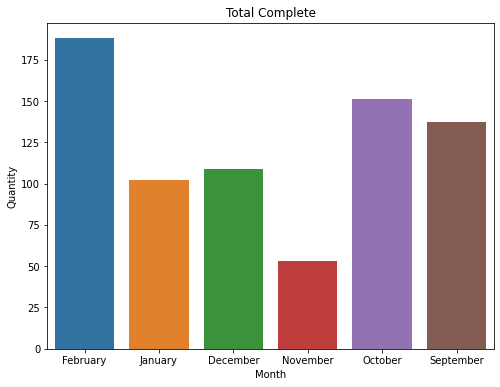

In [12]:
plt.figure(figsize = (8,6))
p = sns.countplot(x="MONTH", data=df_collect)
plt.title('Total Complete')
plt.xlabel('Month')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

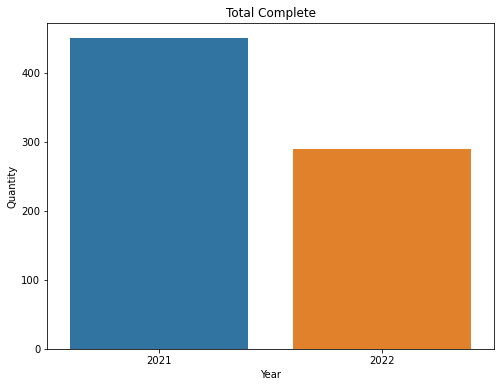

In [13]:
plt.figure(figsize = (8,6))
p = sns.countplot(x="YEAR", data=df_collect)
plt.title('Total Complete')
plt.xlabel('Year')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

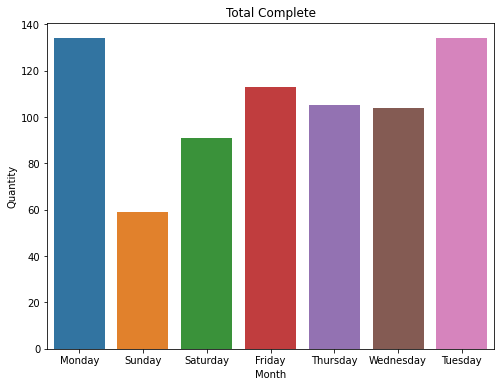

In [14]:
plt.figure(figsize = (8,6))
p = sns.countplot(x="DAY", data=df_collect)
plt.title('Total Complete')
plt.xlabel('Month')
plt.ylabel('Quantity')

array([<AxesSubplot:ylabel='COLLECT_ID'>], dtype=object)

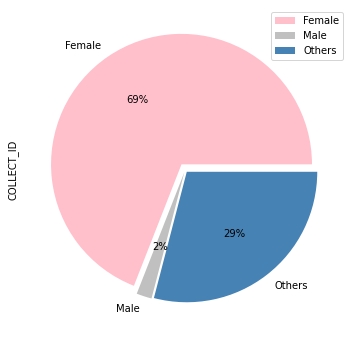

In [15]:
colors = ['pink', 'silver', 'steelblue']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.02, 0.02)
  
# Plotting the pie chart for above dataframe
df_collect.groupby('GENDER').count()[['COLLECT_ID']].plot(kind='pie', subplots=True, autopct='%1.0f%%',
  colors=colors, explode=explode, figsize=(8,6))

Text(0, 0.5, 'Quantity')

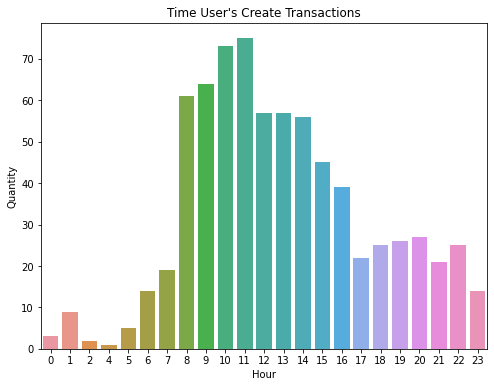

In [16]:
plt.figure(figsize = (8,6))
p = sns.countplot(x="HOUR", data=df_collect)
plt.title('Time User\'s Create Transactions')
plt.xlabel('Hour')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

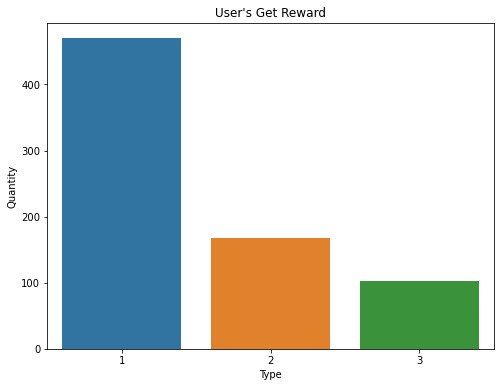

In [17]:
plt.figure(figsize = (8,6))
p = sns.countplot(x="TYPES_OF_REWARD", data=df_collect)
plt.title('User\'s Get Reward')
plt.xlabel('Type')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

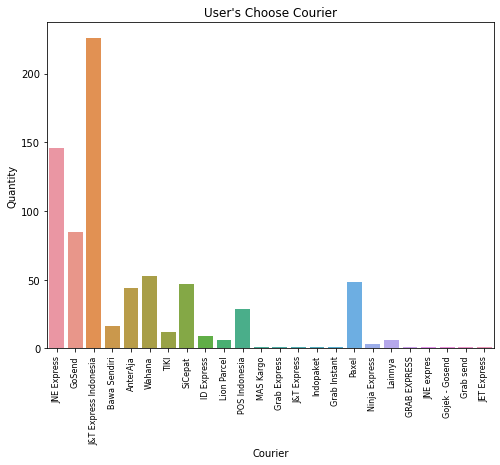

In [18]:
plt.figure(figsize = (8,6))
p = sns.countplot(x="COURIER", data=df_collect)
plt.title('User\'s Choose Courier')
plt.xticks(rotation = 'vertical', size=8)
plt.xlabel('Courier')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

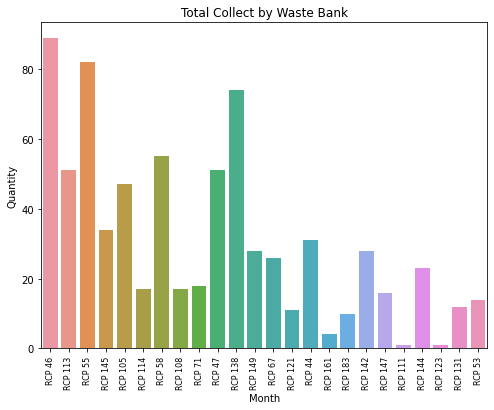

In [19]:
plt.figure(figsize = (8,6))
p = sns.countplot(x="PLACE_NAME", data=df_collect)
plt.title('Total Collect by Waste Bank')
plt.xticks(rotation = 'vertical', size=8)
plt.xlabel('Month')
plt.ylabel('Quantity')

In [20]:
[features for features in df_collect.columns if df_collect[features].isnull().sum()>0]

['FROM_CITY']

In [21]:
from_city= df_collect.FROM_CITY.value_counts().index
from_city

Index(['kota adm. jakarta selatan', 'kota bekasi', 'Kota Jakarta Selatan',
       'Kota Jakarta Timur', 'kota adm. jakarta timur',
       'Kota Tangerang Selatan', 'Kota Bandung', 'Kota Depok', 'kota surabaya',
       'Kabupaten Sidoarjo',
       ...
       'kab. kendal', 'kab. serang', 'kota pekalongan', 'Kabupaten Tegal',
       'kab. pangandaran', 'Kabupaten Lampung Timur Lampung',
       'kab. rejang lebong', 'Kota Sukabumi', 'Kabupaten Kudus', 'kota batu'],
      dtype='object', length=206)

In [22]:
df_city = pd.DataFrame(data=from_city).rename(columns={0:"city"}).reset_index()
df_city

,index,city
0,0,kota adm. jakarta selatan
1,1,kota bekasi
2,2,Kota Jakarta Selatan
3,3,Kota Jakarta Timur
4,4,kota adm. jakarta timur
...,...,...
201,201,Kabupaten Lampung Timur Lampung
202,202,kab. rejang lebong
203,203,Kota Sukabumi
204,204,Kabupaten Kudus


In [23]:
df_city['new_name'] = df_city.city.str.lower()
df_city

,index,city,new_name
0,0,kota adm. jakarta selatan,kota adm. jakarta selatan
1,1,kota bekasi,kota bekasi
2,2,Kota Jakarta Selatan,kota jakarta selatan
3,3,Kota Jakarta Timur,kota jakarta timur
4,4,kota adm. jakarta timur,kota adm. jakarta timur
...,...,...,...
201,201,Kabupaten Lampung Timur Lampung,kabupaten lampung timur lampung
202,202,kab. rejang lebong,kab. rejang lebong
203,203,Kota Sukabumi,kota sukabumi
204,204,Kabupaten Kudus,kabupaten kudus


In [24]:
df_city['new_name'].replace(to_replace ="kabupaten",
                 value ="kab.",regex=True, inplace=True)

In [25]:
def get_length_word(word):
    result = word.split(' ')
    return len(result)


df_city['length'] = df_city['new_name'].apply(lambda x : get_length_word(x))
df_city

,index,city,new_name,length
0,0,kota adm. jakarta selatan,kota adm. jakarta selatan,4
1,1,kota bekasi,kota bekasi,2
2,2,Kota Jakarta Selatan,kota jakarta selatan,3
3,3,Kota Jakarta Timur,kota jakarta timur,3
4,4,kota adm. jakarta timur,kota adm. jakarta timur,4
...,...,...,...,...
201,201,Kabupaten Lampung Timur Lampung,kab. lampung timur lampung,4
202,202,kab. rejang lebong,kab. rejang lebong,3
203,203,Kota Sukabumi,kota sukabumi,2
204,204,Kabupaten Kudus,kab. kudus,2


In [26]:
df_a = df_city[{'index','new_name','length'}]
df_a = df_a[df_a['length'] > 4]
df_a['split'] =df_a['new_name'].str.split()
df_a['new'] = df_a['split'].str[0]+" "+df_a['split'].str[1]+" "+df_a['split'].str[2]
df_a

,length,new_name,index,split,new
90,7,kota jakarta selatan daerah khusus ibukota jak...,90,"[kota, jakarta, selatan, daerah, khusus, ibuko...",kota jakarta selatan
146,6,kab. lombok timur nusa tenggara barat,146,"[kab., lombok, timur, nusa, tenggara, barat]",kab. lombok timur
150,5,kab. bandung barat jawa barat,150,"[kab., bandung, barat, jawa, barat]",kab. bandung barat
166,9,kota bengkulu. padang nangka kec. singaran pat...,166,"[kota, bengkulu., padang, nangka, kec., singar...",kota bengkulu. padang
168,7,kota jkt utara daerah khusus ibukota jakarta,168,"[kota, jkt, utara, daerah, khusus, ibukota, ja...",kota jkt utara
182,7,kota jakarta barat daerah khusus ibukota jakarta,182,"[kota, jakarta, barat, daerah, khusus, ibukota...",kota jakarta barat


In [27]:
cit= list(df_a.index.value_counts().index)
cit

[90, 146, 150, 166, 168, 182]

In [28]:
df_city.loc[df_city['length'] > 4,'new_name'] = df_a['new']
df_city

,index,city,new_name,length
0,0,kota adm. jakarta selatan,kota adm. jakarta selatan,4
1,1,kota bekasi,kota bekasi,2
2,2,Kota Jakarta Selatan,kota jakarta selatan,3
3,3,Kota Jakarta Timur,kota jakarta timur,3
4,4,kota adm. jakarta timur,kota adm. jakarta timur,4
...,...,...,...,...
201,201,Kabupaten Lampung Timur Lampung,kab. lampung timur lampung,4
202,202,kab. rejang lebong,kab. rejang lebong,3
203,203,Kota Sukabumi,kota sukabumi,2
204,204,Kabupaten Kudus,kab. kudus,2


In [29]:
df_b = df_city[df_city['new_name'] .str.contains('kota jakarta')].replace('jakarta','adm. jakarta', regex=True)
# df_b = df_b['new_name'].str.replace('jakarta','adm. jakarta', regex=True)

In [30]:
df_b

,index,city,new_name,length
2,2,Kota Jakarta Selatan,kota adm. jakarta selatan,3
3,3,Kota Jakarta Timur,kota adm. jakarta timur,3
22,22,Kota Jakarta Pusat,kota adm. jakarta pusat,3
26,26,Kota Jakarta Barat,kota adm. jakarta barat,3
90,90,Kota Jakarta Selatan Daerah Khusus Ibukota Jak...,kota adm. jakarta selatan,7
182,182,Kota Jakarta Barat Daerah Khusus Ibukota Jakarta,kota adm. jakarta barat,7


In [31]:
replace_jakarta= list(df_b.index.value_counts().index)
replace_jakarta

[2, 3, 22, 26, 90, 182]

In [32]:
df_city.loc[replace_jakarta,'new_name'] = df_b['new_name']
df_city

,index,city,new_name,length
0,0,kota adm. jakarta selatan,kota adm. jakarta selatan,4
1,1,kota bekasi,kota bekasi,2
2,2,Kota Jakarta Selatan,kota adm. jakarta selatan,3
3,3,Kota Jakarta Timur,kota adm. jakarta timur,3
4,4,kota adm. jakarta timur,kota adm. jakarta timur,4
...,...,...,...,...
201,201,Kabupaten Lampung Timur Lampung,kab. lampung timur lampung,4
202,202,kab. rejang lebong,kab. rejang lebong,3
203,203,Kota Sukabumi,kota sukabumi,2
204,204,Kabupaten Kudus,kab. kudus,2


In [33]:
df_c = df_city[df_city['new_name'] .str.contains('city')]
df_c

,index,city,new_name,length
172,172,Sukabumi City,sukabumi city,2
190,190,Surabaya City,surabaya city,2


In [34]:
df_d = df_city[df_city['new_name'] .str.contains('regency')]
df_d

,index,city,new_name,length
159,159,Bantul Regency,bantul regency,2
178,178,Karawang Regency,karawang regency,2
180,180,Sidoarjo Regency,sidoarjo regency,2


In [35]:
df_e = df_city[df_city['new_name'] .str.contains('sby')]
df_e

,index,city,new_name,length
28,28,Kota SBY,kota sby,2


In [36]:
df_f = df_city[df_city['new_name'] .str.contains('bks')]
df_f

,index,city,new_name,length
32,32,Kota Bks,kota bks,2
